## Introduction
#### Time Series is am important form of structured data in different fields. eg - finance, economics, physics, etc.
#### Anything observed or measured at many points in time forms a time series.
#### Many Time Series are 'fixed frequency' i.e. data points occur at regular intervals.
#### It can also be 'irregular' i.e without a fixed unit of time or offset between units.
#### There are different ways to mark and refer time series, some of which are:
####     1. Timestamps - specific instants of time
####     2. Fixed periods - months (eg - Jan 2017) or full year (eg - 2010)
####     3. Intervals of Time - defined by start and end timestamp. Fixed Periods can be thought of as special cases of Intervals.
####     4. Experiment or elapsed time - Each timestamp is a measure of time relative to a particular start time.
#### pandas has many nuilt-in tools and algorithms for time series. They help to easily dice, aggregate and resample time-series.
#### TIP - pandas also supports indexes based on 'time deltas', which are useful for representing experiment or elapsed time.

## Date and Time Data Types and Tools
#### The Python standard library has data types for date and time data and calendar-related functionality. The modules 'datetime', 'time' and 'calendar' are main modules.
#### 'datetime' stores both date and time down to microsecond. 'timedelta' represents temporal difference between 2 datetime objects.
#### You can add or subtract 'timedelta' or its multiple to a datetime object to get a shifted object.

In [1]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2020, 1, 22, 1, 26, 1, 13669)

In [2]:
now.year, now.month, now.day

(2020, 1, 22)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [4]:
delta.days

926

In [5]:
delta.seconds

56700

In [6]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime
#### You can format datetime objects and pandas' Timestamp objects as strings using 'str' or 'strftime' passing the format specification.
#### You can use the same format codes to convert strings to dates using 'datetime.strptime'.

In [8]:
stamp = datetime(2011, 1, 3)

str(stamp)

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [10]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [11]:
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

#### 'datetime.strptime' is a good way to parse date with known format. But it can be a bit annoying to write a format each time.
#### In this case, you can use 'parser.parse' from third-party 'dateutil' package. It is capable of parsing most human-intelligible date representations.
#### Eg - day appearing before month in dates outside USA is common, for which we can use 'dayfirst=True'.

In [12]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
parse('Jan 13, 1997 10:45 PM')

datetime.datetime(1997, 1, 13, 22, 45)

In [14]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

#### pandas is oriented towards working with arrays of dates either as index or a column in a DataFrame.
#### The 'to_datetime' method parses different kinds of date representations. Standard formats (eg - ISO 8601) can be parsed quickly.
#### It is also able to handle values that should be considered missing. (eg - none, empty string, etc.)
#### datetime objects have number of locale-specific formatting options for systems in other countries or languages. eg - abbreviated month names are different in German and French systems.
#### NOTE - NaT (Not a Time) is pandas' null value for timestamp data.
#### CAUTION - dateutil.parser is useful but imperfect tool. It may even recognize some strings as dates. eg - '42' as year 2042.

In [15]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [17]:
idx[2]

NaT

In [18]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics
#### The most basic time series object in pandas is a Series indexed by timestamps. It is represented external to pandas as Python strings or datetime objects.
#### Under the hood, datetime objects are put in DatetimeIndex.
#### Like other Series, arithematic operations between differently indexed time series automatically align on the dates.

In [19]:
import numpy as np

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.411442
2011-01-05   -0.850160
2011-01-07    0.749534
2011-01-08    0.942562
2011-01-10   -0.592111
2011-01-12    0.216027
dtype: float64

In [20]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [21]:
ts + ts[::2]

2011-01-02   -0.822884
2011-01-05         NaN
2011-01-07    1.499068
2011-01-08         NaN
2011-01-10   -1.184222
2011-01-12         NaN
dtype: float64

#### pandas stores timestamps using NumPy's 'datetime64' data type at nanosecond resolution.
#### Scalar values from 'DatetimeIndex' are pandas 'Timestamp' objects. A 'Timestamp' can be substituted anywhere you would use a 'datetime' object.
#### It can store frequency information and understands time zone conversions and other manipulations.

In [22]:
ts.index.dtype

dtype('<M8[ns]')

In [23]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting
#### Time Series behaves like any other pandas.Series when indexing and selecting based on label.
#### Conveniently, you can pass a string that is interpretable as a date as index.
#### For longer time series, to get easy slices od data, you can pass only a year or year and month.
#### You can also slice using 'datetime' objects.
#### Because most time series data are ordered chronologically, you can slice with timestanps not present in the series to perform range query. You can also pass string, datetime or timestamp for this indexing.
#### Slicing in this manner produces views on the source like slicing NumPy arrays. No data is copied and modificatiosn will be reflected in original data.

In [24]:
stamp = ts.index[2]
ts[stamp]

0.7495339050658033

In [25]:
ts['1/10/2011']

-0.592110966303012

In [26]:
ts['20110110']

-0.592110966303012

In [27]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01    0.752152
2000-01-02   -0.923620
2000-01-03   -2.491550
2000-01-04    1.654612
2000-01-05   -1.556176
2000-01-06    0.791585
2000-01-07   -1.154439
2000-01-08   -0.095800
2000-01-09   -1.977571
2000-01-10    0.630479
Freq: D, dtype: float64

In [28]:
longer_ts['2001']

2001-01-01    1.243797
2001-01-02   -0.146967
2001-01-03    0.592193
2001-01-04    1.753945
2001-01-05   -0.650608
                ...   
2001-12-27   -0.920695
2001-12-28    1.684460
2001-12-29    0.653589
2001-12-30   -1.968323
2001-12-31    0.053141
Freq: D, Length: 365, dtype: float64

In [29]:
longer_ts['2001-05']

2001-05-01    0.421810
2001-05-02   -0.520285
2001-05-03   -0.176494
2001-05-04   -1.302409
2001-05-05   -0.635776
2001-05-06   -0.185743
2001-05-07   -1.489419
2001-05-08    1.045481
2001-05-09   -0.537254
2001-05-10    0.919256
2001-05-11    2.467050
2001-05-12    0.220185
2001-05-13    1.236653
2001-05-14    2.063398
2001-05-15    0.877169
2001-05-16   -0.576559
2001-05-17    2.038996
2001-05-18   -1.124596
2001-05-19   -0.236193
2001-05-20    0.542781
2001-05-21   -0.461875
2001-05-22   -0.310777
2001-05-23    0.150245
2001-05-24   -2.480983
2001-05-25    0.961941
2001-05-26   -1.063269
2001-05-27    1.251160
2001-05-28    1.564494
2001-05-29    0.178274
2001-05-30   -2.011464
2001-05-31    1.535963
Freq: D, dtype: float64

In [30]:
ts[datetime(2011, 1, 7)]

0.7495339050658033

In [31]:
ts

2011-01-02   -0.411442
2011-01-05   -0.850160
2011-01-07    0.749534
2011-01-08    0.942562
2011-01-10   -0.592111
2011-01-12    0.216027
dtype: float64

In [32]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.749534
2011-01-08    0.942562
2011-01-10   -0.592111
dtype: float64

#### There is an equivalent method for instance as well called 'truncate', which slices Series between two dates.
#### All of the above holds true for DataFrame as well, based on indexing on its rows.

In [33]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.411442
2011-01-05   -0.850160
2011-01-07    0.749534
2011-01-08    0.942562
dtype: float64

In [34]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns = ['Colorado', 'Texas',
                                'New York', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.328840,0.178167,0.411663,-0.382195
2001-05-09,0.201762,0.923383,-1.104137,-0.560169
2001-05-16,2.004143,0.072178,1.159528,-1.263780
2001-05-23,0.327519,-1.197173,-1.323196,0.811350
2001-05-30,-0.857965,0.372192,-0.591455,-1.605456


### Time Series with Duplicate Indices
#### In some scenarios, you may have multiple data observations falling on particular timestamp. You can determine if the index is not unique by using 'is_unique' property.
#### Indexing in such a time series will either produce scalar values or slices, depending on condition that timestamp is duplicated or not.
#### A way to aggregate on non-unique timestamps is to use 'groupby' and pass 'level=0'.

In [35]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                         '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [36]:
dup_ts.index.is_unique

False

In [37]:
dup_ts['1/3/2000']

4

In [38]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [39]:
grouped = dup_ts.groupby(level=0)

grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [40]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting
#### Generic time series in pandas are assumed to be irregular i.e. no fixed frequency.
#### Sometimes, it is necessary to work with relatively fixed frequency, even if it means introducing missing values in the series.
#### pndas has full suite of standard time series frequencies and tools for resampling, interferring frequencies, and generating fixed-frequency date ranges. eg - You can convert sample time series into fixd daily frequency using 'resample'. Using string 'D' for 'daily frequency'.

In [41]:
ts

2011-01-02   -0.411442
2011-01-05   -0.850160
2011-01-07    0.749534
2011-01-08    0.942562
2011-01-10   -0.592111
2011-01-12    0.216027
dtype: float64

In [42]:
resampler = ts.resample('D')

In [43]:
resampler

### Generating Date Ranges
#### 'pandas.date_range' is responsible for generating 'DatetimeIndex' with indicated length based on particulare frequency.
#### By default, it generates daily timestamps. If you only pass either start or end date, you must also pass number of periods as well. 
#### The start and end dates define strict boundaries for generated date index.
#### Eg - to get last business day each month, you would pass 'BM' frequency.
#### By default, date_range preserves the time of the start or end timestamp.
#### You can even create set of timestamps normalized to midnight using the 'normalize' option.

In [44]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [45]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range(start='2012-06-01', periods=20)

DatetimeIndex(['2012-06-01', '2012-06-02', '2012-06-03', '2012-06-04',
               '2012-06-05', '2012-06-06', '2012-06-07', '2012-06-08',
               '2012-06-09', '2012-06-10', '2012-06-11', '2012-06-12',
               '2012-06-13', '2012-06-14', '2012-06-15', '2012-06-16',
               '2012-06-17', '2012-06-18', '2012-06-19', '2012-06-20'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [48]:
# Timestamp of 12:56:31 preserved
pd.date_range('2012-05-02 12:56:31', periods=5) 

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [49]:
# Timestamp normalized to midnight i.e. 12:56:31 removed
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) 

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets
#### Frequencies in pandas are composed of 'base frequency' and 'multiplier'. Base frequencies are typicall referred by string alias. eg - 'M' for monthly, 'H' for hourly.
#### For each base frequency, there is a defined object called 'date offset'. eg - hourly can be represented with Hour class.
#### You can define a multiple of an offset by passing an integer.
#### You never need to explicitly need to create any of the objects. Instead just use string alias. eg - '4H', 'H'. Putting an integer before base frequency creates a multiple.

In [50]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [51]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [52]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

#### Offsets can be combined together by addition.
#### Rather than passing specific code for frequency, you can pass strings (eg- '1h30min') that will be parsed to the same expression.
#### Some frequencies describe data points not evenly spaced (eg - 'M', 'BM' i.e. last business day of the month). These depend on number of days, whether month ends on wekend or not, etc. These are called as 'anchored offsets'.
#### NOTE - Users can define their own custom frequency classes to make up for any date logic not available in pandas.

In [53]:
Hour(2) + Minute(30)

<150 * Minutes>

In [54]:
pd.date_range('2001-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 01:30:00',
               '2001-01-01 03:00:00', '2001-01-01 04:30:00',
               '2001-01-01 06:00:00', '2001-01-01 07:30:00',
               '2001-01-01 09:00:00', '2001-01-01 10:30:00',
               '2001-01-01 12:00:00', '2001-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### Shifting (Leading and Lagging) Data
#### "Shifting" refers to moving data backward and forward through time. Bot Series and DataFrame have 'shift' method for naive shifts, leaving the index unmodified.
#### When we shift, missing data is introduced either at start or end of the series.
#### Common use of shift is computing percent changes in time series or multiple time series as DataFrame columns.

In [55]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.613038
2000-02-29   -1.534382
2000-03-31   -0.203619
2000-04-30    0.689090
Freq: M, dtype: float64

In [56]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.613038
2000-04-30   -1.534382
Freq: M, dtype: float64

In [57]:
ts.shift(-2)

2000-01-31   -0.203619
2000-02-29    0.689090
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [58]:
ts / ts.shift(1) -1

2000-01-31         NaN
2000-02-29   -3.502916
2000-03-31   -0.867296
2000-04-30   -4.384220
Freq: M, dtype: float64

#### Because naive shifts leave index unmodified, some data is discarded. But if the frequency is known, it can be passed to shift to advance the timestamps instead of just the data.
#### Different frequencies can be passed, giving some flexibility on how to lead and lag the data. eg - 'T' for minutes.

In [59]:
ts.shift(3, freq='D')

2000-02-03    0.613038
2000-03-03   -1.534382
2000-04-03   -0.203619
2000-05-03    0.689090
dtype: float64

In [60]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.613038
2000-02-29 01:30:00   -1.534382
2000-03-31 01:30:00   -0.203619
2000-04-30 01:30:00    0.689090
Freq: M, dtype: float64

### Shifting Dates with Offsets
#### The pandas date offsets can also be used with 'datetime' or 'Timestamp' objects.
#### If you add anchored offset (eg - 'MonthEnd'), the first increment will 'roll forward' a date to the next date based on the frequency rule.

In [61]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [62]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [63]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

#### Anchored offsets can explicitly 'roll' dates forward or backward using 'rollforward' and 'rollback' methods.
#### One creative use of offsets is to use them with 'groupby'. It groups based on the offset like month end and calculates aggregate value. But the effects can be much easily be implemented using 'resample'.

In [64]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [65]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [66]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))

ts

2000-01-15   -0.954165
2000-01-19   -0.075314
2000-01-23   -1.040072
2000-01-27   -0.838033
2000-01-31   -0.891973
2000-02-04    1.645251
2000-02-08    1.676169
2000-02-12    0.091097
2000-02-16   -1.635820
2000-02-20    1.843708
2000-02-24    0.074002
2000-02-28    0.172182
2000-03-03    0.244215
2000-03-07    0.360256
2000-03-11    0.998931
2000-03-15    0.094360
2000-03-19   -0.700015
2000-03-23   -0.092799
2000-03-27   -0.368469
2000-03-31   -1.673856
Freq: 4D, dtype: float64

In [67]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.759911
2000-02-29    0.552370
2000-03-31   -0.142172
dtype: float64

In [68]:
ts.resample('M').mean()

2000-01-31   -0.759911
2000-02-29    0.552370
2000-03-31   -0.142172
Freq: M, dtype: float64

## Time Zone Handling
#### Working with time zones is considered one of the most unpleasant parts of time series manipulation.
#### Hence many users choose to work in 'coordinated universal time' or 'UTC' which is the current International Standard.
#### In Python, time zone info comes from third-party 'pytz' library. It exposes the 'Olson database', which is a compilation of world time zone information.
#### This is more important for historical data because the 'daylight saving time (DST)' transition dates have been changed numerous times.
#### pandas wraps pytz's functionality so you can ignore its API outside of time zone names, which can be found interactively in the docs.
#### To get time zone object from pytz, use 'pytz.timezone'.

In [69]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [70]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion
#### By default, time series in pandas are 'time zone naive' i.e. the 'tz' field is None.
#### We can create date ranges with a set time zone. But conversion from naive to localizeed is handled by 'tz_localize'.
#### We can even convert time zones of the time series. eg - EST to UTC
#### DateTimeIndex also has the same instance methods like 'tz_localize' and 'tz_convert'.
#### CAUTION - Localizing naive timestamps also checks for ambiguous or non-existent times around daylight saving time transitions.

In [71]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-09 09:30:00    0.575370
2012-03-10 09:30:00    0.025189
2012-03-11 09:30:00    1.162513
2012-03-12 09:30:00    0.488650
2012-03-13 09:30:00    1.141226
2012-03-14 09:30:00    1.873353
Freq: D, dtype: float64

In [72]:
print(ts.index.tz)

None


In [73]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [74]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.575370
2012-03-10 09:30:00+00:00    0.025189
2012-03-11 09:30:00+00:00    1.162513
2012-03-12 09:30:00+00:00    0.488650
2012-03-13 09:30:00+00:00    1.141226
2012-03-14 09:30:00+00:00    1.873353
Freq: D, dtype: float64

In [75]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [76]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.575370
2012-03-10 04:30:00-05:00    0.025189
2012-03-11 05:30:00-04:00    1.162513
2012-03-12 05:30:00-04:00    0.488650
2012-03-13 05:30:00-04:00    1.141226
2012-03-14 05:30:00-04:00    1.873353
Freq: D, dtype: float64

In [77]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.575370
2012-03-10 14:30:00+00:00    0.025189
2012-03-11 13:30:00+00:00    1.162513
2012-03-12 13:30:00+00:00    0.488650
2012-03-13 13:30:00+00:00    1.141226
2012-03-14 13:30:00+00:00    1.873353
Freq: D, dtype: float64

In [78]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.575370
2012-03-10 15:30:00+01:00    0.025189
2012-03-11 14:30:00+01:00    1.162513
2012-03-12 14:30:00+01:00    0.488650
2012-03-13 14:30:00+01:00    1.141226
2012-03-14 14:30:00+01:00    1.873353
Freq: D, dtype: float64

In [79]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone - Aware Timestamp Objects
#### Similar to time-series and date ranges, Timestamp objects can also be localized from naive to time zone-aware and converted from one zone to another.
#### We can also pass a time zone when creating a Timestamp. They internally store UTC timestamp value as nanoseconds since the Unix ecpoch (January 1, 1970). This UTC value is invariant between time zone conversions.

In [80]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [81]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz = 'Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [82]:
stamp_utc.value

1299902400000000000

In [83]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

#### When doing time arithematic with pandas's 'DateOffset' objects, it respects daylight saving time transitions where possible.
#### We can check this by using Timestamps taken 30 minutes before and 90 minutes after Daylight Savings Time.

In [84]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [85]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [86]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [87]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones
#### If we combine 2 time series from different time zones, the result will be UTC.
#### Since timestamps are stored as UTC under the hood, the operation is straightforward and requires no conversion.

In [88]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.917611
2012-03-08 09:30:00    0.208017
2012-03-09 09:30:00   -0.167803
2012-03-12 09:30:00   -1.145028
2012-03-13 09:30:00   -0.097964
2012-03-14 09:30:00   -0.595607
2012-03-15 09:30:00    1.286656
2012-03-16 09:30:00   -2.291631
2012-03-19 09:30:00   -1.480406
2012-03-20 09:30:00   -0.679396
Freq: B, dtype: float64

In [89]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2

result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### Periods and Period Arithemetic
#### Periods represent timespans. eg - days, months, quarters, years, etc.
#### The 'Period' class represents this data type, needing a string or integers and a frequency.
#### Adding or subtracting integers from periods has the effect of shifting by their frequency.
#### If 2 periods have same frequency, their difference is number of units between them. eg - days, montds, years, etc.

In [90]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [91]:
p + 5

Period('2012', 'A-DEC')

In [92]:
p - 2

Period('2005', 'A-DEC')

In [93]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

#### Regular ranges of periods can be constructed using the 'period_range' function.
#### The 'PeriodIndex' class stores sequence of periods and can serve as an axis index in any pandas data structure.
#### We can also use an array of strings with this class.

In [94]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [95]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.495578
2000-02    1.557870
2000-03   -0.873777
2000-04    0.823953
2000-05    0.226102
2000-06    2.616673
Freq: M, dtype: float64

In [96]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion
#### Periods and PeriodIndex objects can be converted to other frequencies with 'asfreq' method. eg - annual to monthly period.
#### You can think of a period as a cursor pointing to a span of time, subdivided by its defined sub-periods.
#### When converting from high to lower frequency, pandas determines superperiod depending on where the subperiod "belongs". eg - for 'A-JUN' frequency, 'Aug-2007' will belong to 2008 period.

In [97]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [98]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [99]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [100]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [101]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [102]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [103]:
p = pd.Period('Aug-2007', freq='M')

p.asfreq('A-JUN')

Period('2008', 'A-JUN')

#### Whole PeriodIndex objects or time series can also be converted with same semantics.
#### We can change the frequency to indicate what we want at the end of the period. eg - changing frequency as 'B' for having last business day of each year.

In [104]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.488147
2007   -0.296322
2008    0.337657
2009    0.798903
Freq: A-DEC, dtype: float64

In [105]:
ts.asfreq('M', how='start')

2006-01   -1.488147
2007-01   -0.296322
2008-01    0.337657
2009-01    0.798903
Freq: M, dtype: float64

In [106]:
ts.asfreq('B', how='end')

2006-12-29   -1.488147
2007-12-31   -0.296322
2008-12-31    0.337657
2009-12-31    0.798903
Freq: B, dtype: float64

### Quarterly Period Frequencies
#### Quarterly data is standard in accounting, finance, etc. Much of this data is reported relative to a fiscal year end, especially last calendar or business day.
#### Period '2012Q4' has different meaning depending on fiscal year end.
#### pandas supports all 12 possible quarterly frequencies - Q-JAN through Q-DEC.
#### eg - For fiscal year ending in January, 2012Q4 runs from November through January.

In [107]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [108]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [109]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

#### This makes it easy to do period arithematic. eg - getting timestamp at 4 pm on second-to-last business day of the quarter.
#### You can generate quarterly ranges using 'period_range'. Performing arithematic is similar.

In [110]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [111]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [112]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [113]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()

ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)
#### Series and DataFrame objects indexed by timestamps can be converted to periods with 'to_period' method.
#### As periods refer to non-overlapping timespans, one timestamp can belong to only one period for a given frequency. 
#### While frequency in 'PeriodIndex'is inferred from the timestamps by default, you cn specify any frequency you want.
#### Having duplicate periods in the result is also not a problem.
#### To convert back to timestamps, use 'to_timestamp'.

In [114]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)

ts

2000-01-31   -0.757379
2000-02-29    1.959685
2000-03-31    0.869362
Freq: M, dtype: float64

In [115]:
pts = ts.to_period()

pts

2000-01   -0.757379
2000-02    1.959685
2000-03    0.869362
Freq: M, dtype: float64

In [116]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)

ts2

2000-01-29    0.388508
2000-01-30    0.541740
2000-01-31    0.039120
2000-02-01   -0.593453
2000-02-02    0.401685
2000-02-03   -0.720718
Freq: D, dtype: float64

In [117]:
ts2.to_period('M')

2000-01    0.388508
2000-01    0.541740
2000-01    0.039120
2000-02   -0.593453
2000-02    0.401685
2000-02   -0.720718
Freq: M, dtype: float64

In [118]:
pts = ts2.to_period()
pts

2000-01-29    0.388508
2000-01-30    0.541740
2000-01-31    0.039120
2000-02-01   -0.593453
2000-02-02    0.401685
2000-02-03   -0.720718
Freq: D, dtype: float64

In [119]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.388508
2000-01-30 23:59:59.999999999    0.541740
2000-01-31 23:59:59.999999999    0.039120
2000-02-01 23:59:59.999999999   -0.593453
2000-02-02 23:59:59.999999999    0.401685
2000-02-03 23:59:59.999999999   -0.720718
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays
#### Fixed frequency datasets sometimes have timespan information spread across multiple columns. eg - macroeconomic dataset has year and uqarter in different columns.
#### By passing these columns as arrays to EpriodIndex with a frequency, we can combine them to form an index for the DataFrame.

In [120]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [121]:
data.year[:5]

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [122]:
data.quarter[:5]

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [123]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                      freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [124]:
data.index=index

data.infl[:10]

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
Freq: Q-DEC, Name: infl, dtype: float64

## Resampling and Frequency Conversion
#### Resampling is the process of converting a time series from one frequency to another.
#### Aggregating higher frequency data to lower frequency is called 'downsampling'. Converting lower frequency data to higher frequency is called 'upsampling'.
#### There can be other instances of sampling not falling in these categories. eg - W-WED to W-FRI.
#### pandas objects are equipped with 'resample' method, which is the wrokhorse function for frequency conversion.
#### It has a similar API as 'groupby'. You call 'resample' to group the data and then call an aggregation function.
#### 'resample' is a flexible and high-performance function that can process very large time series.

In [125]:
rng = pd.date_range('2001-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts[:10]

2001-01-01    1.626823
2001-01-02   -0.472482
2001-01-03   -1.158860
2001-01-04   -0.107935
2001-01-05   -1.033780
2001-01-06    1.255374
2001-01-07    0.868484
2001-01-08    0.019992
2001-01-09   -1.107327
2001-01-10    0.758445
Freq: D, dtype: float64

In [126]:
ts.resample('M').mean()

2001-01-31   -0.019223
2001-02-28    0.128140
2001-03-31   -0.014319
2001-04-30    0.118445
Freq: M, dtype: float64

In [127]:
ts.resample('M', kind='period').mean()

2001-01   -0.019223
2001-02    0.128140
2001-03   -0.014319
2001-04    0.118445
Freq: M, dtype: float64

### Downsampling
#### Aggregating data to regular, lower frequency is pretty normal task.
#### The data you are aggregating does not need to be fixed frequently, the desired frequency defines 'bin edges' used to slice teh time series into pieces to aggregate.
#### Each interval is said to be half-open, a data point can only be in one interval and a union of intervals must make up whole time frame.
#### There are couple of things to think about before using 'resample' to downsample data:
####     1. Which side of the interval is closed.
####     2. How to label each aggregated bin, either with start of interval or the end.

In [128]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

#### We can aggregate any time series data into chunks or bars of defined frequency and use an aggregate function on them. eg - sum, avg, etc.
#### The frequency you pass defines the bin edges. By default, the 'left' bin edge is inclusive. But passing " closed='right' " changes the interval to be closed on the right.

In [129]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [130]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

#### By default, the series is labeled by timestamps from left side of each bin. You can make it the right edge of the bin by passing " label='right' ".
#### You may sometime want to shift the result by some amount (eg - subtract 1 second from right edge of bin). For this, you can pass a string or date offset to 'loffset'.
#### You can achieve the same effect by calling the 'shift' method.

In [131]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [132]:
ts.resample('5min', closed='right', 
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-High-Low-Close (OHLC) resampling:
#### In finance, a popular way to aggregate time series is to compute 4 values for each bucket: first (open), last (close), maximum (high) and minimal (low) values.
####     We can use the 'ohlc' aggregate function to get a DataFrame having columns having the 4 aggregates, which are efficiently computed is a single sweep of the data.

In [133]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation
#### When converting low frequency to higher frequency, we do not need aggergation.
#### When we want to aggregate with only 1 value per group, then missing values result in gaps. We use 'asfreq' method to convert to the higher frequencies without aggregation.
#### Next, we fill the gaps using filling or interpolation methods available like 'ffill', fillna' and 'reindex' which we used for resampling.

In [134]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.033214,-1.348270,-0.288982,-0.410441
2000-01-12,0.963685,-1.181641,0.192156,-1.518564


In [135]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.033214,-1.348270,-0.288982,-0.410441
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.963685,-1.181641,0.192156,-1.518564


In [136]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.033214,-1.348270,-0.288982,-0.410441
2000-01-06,0.033214,-1.348270,-0.288982,-0.410441
2000-01-07,0.033214,-1.348270,-0.288982,-0.410441
2000-01-08,0.033214,-1.348270,-0.288982,-0.410441
2000-01-09,0.033214,-1.348270,-0.288982,-0.410441
2000-01-10,0.033214,-1.348270,-0.288982,-0.410441
2000-01-11,0.033214,-1.348270,-0.288982,-0.410441
2000-01-12,0.963685,-1.181641,0.192156,-1.518564


#### You can similarly choose to only fill certain number of periods to limit how far to conyinue without an observed value.
#### The new date index created need not overlap the old one at all. If we resample back with the same frequency, we will get the original series back.

In [137]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.033214,-1.348270,-0.288982,-0.410441
2000-01-06,0.033214,-1.348270,-0.288982,-0.410441
2000-01-07,0.033214,-1.348270,-0.288982,-0.410441
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.963685,-1.181641,0.192156,-1.518564


In [138]:
# Old time series can be attained without overlap.
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.033214,-1.348270,-0.288982,-0.410441
2000-01-13,0.963685,-1.181641,0.192156,-1.518564


### Resampling with Periods
#### Resampling data indexed by periods is similar to timestamps.
#### Upsampling is more nuanced, as you have to make a decision about which end of the timespan in the new frequency to place the values before resampling. Just like 'asfreq' method. 
#### The 'convention' argument defaults to 'start' but you can change it to 'end'.

In [139]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                                         freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.179412,-1.346292,0.306616,0.179854
2000-02,1.039320,1.964773,-1.281311,-0.574941
2000-03,-0.561425,-0.566738,-0.911210,-0.714139
2000-04,-0.281339,-0.162233,0.417232,-0.822970
2000-05,0.683968,-0.468341,0.312191,0.074100


In [140]:
annual_frame = frame.resample('A-DEC').mean()

annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.140677,0.118660,-0.003287,-0.306898
2001,0.119049,0.232795,0.658601,0.301469


In [141]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.140677,0.118660,-0.003287,-0.306898
2000Q2,-0.140677,0.118660,-0.003287,-0.306898
2000Q3,-0.140677,0.118660,-0.003287,-0.306898
2000Q4,-0.140677,0.118660,-0.003287,-0.306898
2001Q1,0.119049,0.232795,0.658601,0.301469
2001Q2,0.119049,0.232795,0.658601,0.301469
2001Q3,0.119049,0.232795,0.658601,0.301469
2001Q4,0.119049,0.232795,0.658601,0.301469


In [142]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.140677,0.118660,-0.003287,-0.306898
2001Q1,-0.140677,0.118660,-0.003287,-0.306898
2001Q2,-0.140677,0.118660,-0.003287,-0.306898
2001Q3,-0.140677,0.118660,-0.003287,-0.306898
2001Q4,0.119049,0.232795,0.658601,0.301469


#### Periods refer to timespans, teh rules about upsampling and downsampling are a more rigid:
####     1. In downsampling, target frequency must be a 'subperiod' of source frequency.
####     2. In upsampling, target frequency must be a 'superperiod' of source frequency.
#### If the above rules are not satisfied , an exception will be raised. This mainly affects quarterly, annual and weekly frequencies.
#### eg - timespans defined by 'Q-MAR' only line up with 'A-MAR', 'A-JUN', 'A-SEP' and 'A-DEC'.

In [143]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.140677,0.118660,-0.003287,-0.306898
2001Q1,-0.140677,0.118660,-0.003287,-0.306898
2001Q2,-0.140677,0.118660,-0.003287,-0.306898
2001Q3,-0.140677,0.118660,-0.003287,-0.306898
2001Q4,0.119049,0.232795,0.658601,0.301469
2002Q1,0.119049,0.232795,0.658601,0.301469
2002Q2,0.119049,0.232795,0.658601,0.301469
2002Q3,0.119049,0.232795,0.658601,0.301469


## Moving window Functions
#### An important class of array transformations used for time series operations are staistics and other functions evaluated over sliding window or exponentially decaying weights.
#### It can be useful for smoothing noisy or gappy data. We cam call these 'moving window functions' although they also include exponentially weighted moving average.
#### These functions can authomatically exclude missing data like other statistical functions.

In [144]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                          parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px.resample('B').ffill()

#### The first method we will look into is the 'rolling' operator, which behaves similarly to 'resample' and 'groupby'.
#### It can be called on a Series and DataFrame with a 'window' with number of periods.
#### Its behavior is similar to 'groupby' but instead of grouping, it creates object that enables grouping over the specified sliding window.
#### By default, it requires all values in the window to be non-NA, but this can be changed to account for missing data, especially if you have fewer data that the window period.

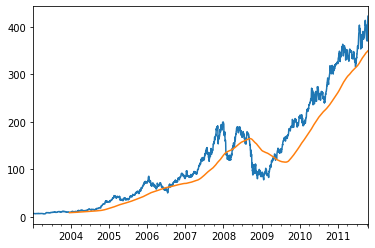

In [145]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [146]:
# We are accounting for minimum of 10 NA values in a window
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

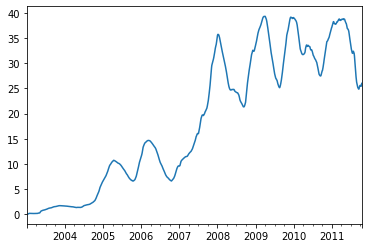

In [147]:
aapl_std250.plot()

#### Another variation to window is expanding window, which starts at the beginning of the series and increases its size until it encompasses the whole series.
#### For this feature we use the 'expanding' operator and then aggregator.

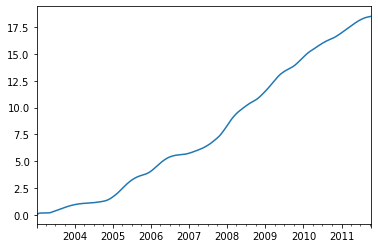

In [148]:
expanding_mean = aapl_std250.expanding().mean()
expanding_mean.plot()

#### Calling a window on a DataFrame applies transformation to each column.
#### The rolling function also accepts a string which indicates a fixed-size time offset, rather than set number of periods.
#### This can be useful for irregular time series. The same strings can be used in 'resample'.

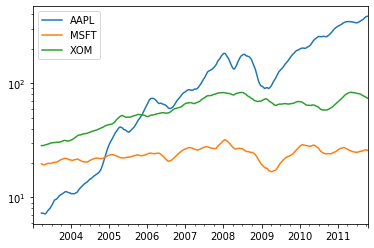

In [149]:
close_px.rolling(60).mean().plot(logy=True)

In [150]:
# Instead of fixed time period, we have a set number of days (20 days) as window
close_px.rolling('20D').mean().head(10)

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### Exponentially weighted functions
#### Alternative to static window size with equally weighted observations is to specify a 'decay factor', giving more weight to recent observations.
#### There are couple of ways to specify decay factor. Most popular one is using 'span'. Its result is comparable to simple moving window with window size equal to span.
#### Because exponentially weighted statistics places more weights on recent observations, it 'adapts' more quickly to changes.
#### pandas has 'ewm' (Exponentially Weighted Moving) operator to go with 'rolling' and 'expanding'.

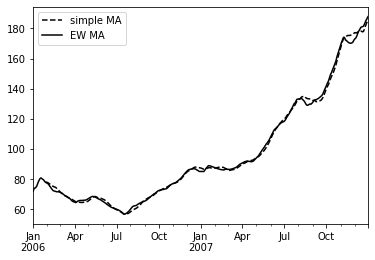

In [151]:
import matplotlib.pyplot as plt

aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()

# Simple Moving Average. changes shown will be slower and inconspicuous.
ma60.plot(style='k--', label='simple MA')

# Expo weighted Moving Average. Changes shown will be quick and pronounced.
ewma60.plot(style='k-', label='EW MA')

plt.legend()

### Binary Moving Window
#### For statistical operations (eg - covariance, correlation), we need to work on 2 time series.
#### To get this, we first compute percent change for our entire time series of interest.
#### The we can call 'corr' aggregation after 'rolling' to get rolling correlation between the two percent changes series.
#### for finding correlation between multiple time series (eg - correlation between S&P 500 with different company stocks), we can write a loop and creating a new DataFrame of correlations. But this might be repetative.
#### So instead we can pass a Series and a DataFrame to 'rolling_corr', which will compute correlation of the Series with each column of the DataFrame.

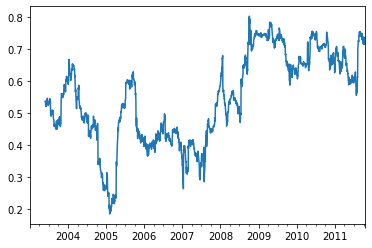

In [152]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

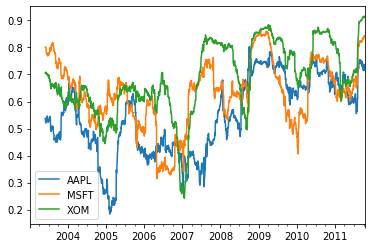

In [153]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions
#### The 'apply' method allows us to implement array functions over a moving window with help of 'rolling'.
#### The only requirement is that the function produce a single value (i.e. reduction) from each piece of the array.
#### eg - Computing sample quantiles using 'rolling().quantile()'.
#### Another requirement may be to get perceentile rank of a particular value over the sample. This is achieved by 'scipy.stats.percentileofscore'.

/Users/dm_fedorov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


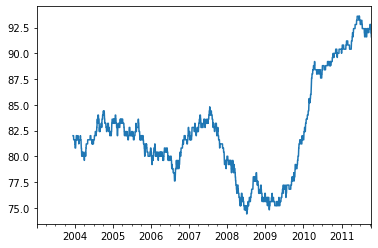

In [154]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)

result = returns.AAPL.rolling(250).apply(score_at_2percent)

result.plot()